In [ ]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

# try solving the following pde:

$\partial_t y = \gamma \partial_x(x^{-2}y) + \beta\partial^2_x(x^{-1}y)$, 

with initial condition
$y(x,t=0) = const \in [1-\delta x,1+\delta x]$

In [1]:
%matplotlib inline
#%pylab inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sympy.solvers.pde import pdsolve
from sympy import Function,diff,Eq
from sympy.abc import x,y,a,b

f=Function('f')
u= f(x,y)
ux = u.diff(x)
uy = u.diff(y)
uyy = u.diff(y,y)
gam = 0.1
beta = 0. #0.25*gam*0.05
print gam,beta
b=0
#eq = Eq(ux-2*(beta-gam)*u/y**3 + (gam-2*beta)*uy/y**2 - beta*uyy/y)
eq = Eq(ux-2*(b-a)*u/y**3 + (a-2*b)*uy/y**2 - b*uyy/y)
pdsolve(eq)


0.1 0.0


f(x, y) == F(-3*a*x + y**3)/(y**3)**(2/3)

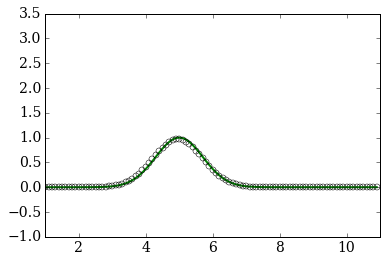

In [84]:
import scipy as sp
import time

gam = 0.1
beta = 0.25*gam*0.05
x0 = 5.0
dx = 0.1  #step size
dt = 10. #0.005
#dt =0.9/beta*1.0*dx**2
time_step=2000
nx = int(10/dx) #Lx = 2  x=[1,11]
dx2 = dx**2

#initial condition
xs = 1.0; xe= 11.0
xgrid = xs+np.arange(nx)*dx
#print xgrid
ui = sp.zeros([nx])
u = sp.zeros([nx])
dxi = 1.0/dx 
dx2i = 1.0/dx2

ui = exp(-(xgrid-x0)**2)
plt.plot(xgrid,ui,'g-')
plt.ylim([-1,3.5])
plt.xlim([1,11]) 
#for i in range(nx):
#  if (np.abs(xgrid[i]-x0)<10*dx):
#    ui[i] = 2.5
    
c1 = 2.0*(beta-gam) 
c2 = gam - 2.*beta
c3 = beta
#print np.arange(0,nx)
# differentiate the pde
def evolve_ts(u,ui):
#  for i in np.arange(1,nx-1):
#    ux = (u[i+1]-u[i-1])*dxi*0.5
#    uxx = (u[i+1]-2.0*u[i]+u[i-1])*dx2i
#  u[i] = 0.5*(ui[i-1]+ui[i+1])+dt*(c1*ui[i]+c2*ux+c3*uxx)
  u[1:-1] = 0.5*(ui[:-2]+ui[2:])+dt*(c1*ui[1:-1]/(xgrid[1:-1])**3 \
                                  + c2*(ui[2:]-ui[:-2])*dxi*0.5/(xgrid[1:-1])**2 \
                                  + c3*(ui[2:]-2.0*ui[1:-1]+ui[:-2])*dx2i/xgrid[1:-1])

#def updatefig(*args):
#  global u,ui  
    
   
#time integration
for j in range(1,time_step):
  evolve_ts(u,ui)
  #if (j== time_step/10): 
  #  plt.plot(xgrid,u)
  #  plt.ylim([-1,2.5])
  #  plt.xlim([1,11])
    
plt.plot(xgrid,u,'or',mfc='None')

test with advection:  $\partial_t y = \gamma\partial_x y$

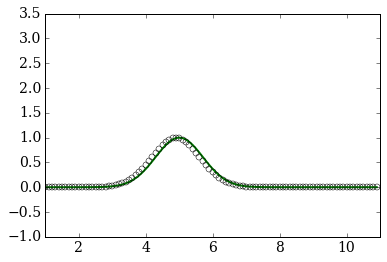

In [90]:
import scipy as sp
import time

gam = 1


dt = 0.1 #0.005
#dt =0.9/beta*1.0*dx**2
time_step=200000
xs = 1.0; xe= 11.0; x0=5
dx = 0.1  #step size
nx = int((xe-xs)/dx) #Lx = 2  x=[1,11]
dx2 = dx**2

#initial condition
xgrid = xs+np.arange(nx)*dx
#print xgrid
ui = sp.zeros([nx])
u = sp.zeros([nx])
dxi = 1.0/dx 
dx2i = 1.0/dx2

ui = exp(-(xgrid-x0)**2)
plt.plot(xgrid,ui,'g-')
plt.ylim([-1,3.5])
plt.xlim([1,11]) 

#print np.arange(0,nx)
# differentiate the pde
def evolve_ts(u,ui):
#  for i in np.arange(1,nx-1):
#    ux = (u[i+1]-u[i-1])*dxi*0.5
#    uxx = (u[i+1]-2.0*u[i]+u[i-1])*dx2i
#  u[i] = 0.5*(ui[i-1]+ui[i+1])+dt*(c1*ui[i]+c2*ux+c3*uxx)
  u[1:-1] = 0.5*(ui[0:-2]+ui[2:])+dt*(gam*(ui[2:]-ui[0:-2])*dxi*0.5) #/(xgrid[1:-1])**2 \
#                                  + c3*(ui[2:]-2.0*ui[1:-1]+ui[:-2])*dx2i/xgrid[1:-1])

#def updatefig(*args):
#  global u,ui  
    
   
#time integration
for j in range(1,time_step):
  global u,ui
  evolve_ts(u,ui)
  #if (j== time_step/10): 
  #  plt.plot(xgrid,u)
  #  plt.ylim([-1,2.5])
  #  plt.xlim([1,11])
    
plt.plot(xgrid,u,'or',mfc='None')

# solve diffusion equation with FiPy

$\frac{\partial y}{\partial t} = D\frac{\partial^2 y}{\partial x^2} $

False
Explicit transient diffusion. Press <return> to proceed...


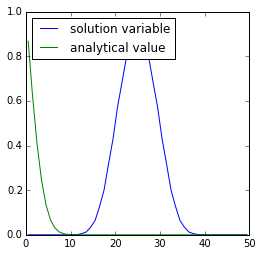

In [108]:
%matplotlib inline
from fipy import *
nx = 50
dx = 1.
mesh = Grid1D(nx=nx, dx=dx)
L = 50
x=mesh.cellCenters[0]
phi = CellVariable(name="solution variable",  mesh=mesh, value=0.)
phi.setValue(1., where=(x > L/2. - L/10.) & (x < L/2. + L/10.))
D = 1.
#valueLeft = 0
#valueRight = 0
#phi.constrain(valueRight, mesh.facesRight)
#phi.constrain(valueLeft, mesh.facesLeft)
eqI = TransientTerm() == ExplicitDiffusionTerm(coeff=D)
timeStepDuration = 0.9 * dx**2 / (2 * D)
steps = 10
phiAnalytical = CellVariable(name="analytical value", mesh=mesh)
    
if __name__ == '__main__':
  viewer = Viewer(vars=(phi, phiAnalytical),datamin=0., datamax=1.)
  viewer.plot()
  x = mesh.cellCenters[0]
  t = timeStepDuration * steps
try:
  from scipy.special import erf 
  phiAnalytical.setValue(1 - erf(x / (2 * numerix.sqrt(D * t)))) 
except ImportError:
  print "The SciPy library is not available to test the solution to \
  the transient diffusion equation"

for step in range(steps):
  eqI.solve(var=phi,dt=timeStepDuration)
  if __name__ == '__main__':
    viewer.plot()
    
print phi.allclose(phiAnalytical, atol = 7e-4) 
if __name__ == '__main__':
   raw_input("Explicit transient diffusion. Press <return> to proceed...")

# solve advection equation with FiPy

$\frac{\partial y}{\partial t} = -v \frac{\partial y}{\partial x}$

In [61]:
%matplotlib
from fipy import *
nx = 100
dx = 0.1
mesh = Grid1D(nx=nx, dx=dx)
L = nx*dx
x=mesh.cellCenters[0]
phi = CellVariable(name="solution variable",  mesh=mesh, value=0.)
#phi.setValue(1., where=(x > L/2. - L/10.) & (x < L/2. + L/10.))
phi.setValue(numerix.exp(-(x-L/4.)**2/0.1))

D = (1,)
#valueLeft = 0
#valueRight = 0
#phi.constrain(valueRight, mesh.facesRight)
#phi.constrain(valueLeft, mesh.facesLeft)
eqI = TransientTerm() + ExponentialConvectionTerm(coeff=D) == 0 #ConvectionTerm(coeff=D)
timeStepDuration = 0.1 * dx/D[0]
steps = 200
phiAnalytical = CellVariable(name="analytical value", mesh=mesh)
    
if __name__ == '__main__':
  viewer = Viewer(vars=(phi),datamin=0., datamax=1.)
  viewer.plot()
  x = mesh.cellCenters[0]
  t = timeStepDuration * steps

for step in range(steps):
  eqI.solve(var=phi,dt=timeStepDuration)
  if __name__ == '__main__':
    viewer.plot()
    
print phi.allclose(phiAnalytical, atol = 7e-4) 
if __name__ == '__main__':
   raw_input("Explicit transient diffusion. Press <return> to proceed...")

Using matplotlib backend: Qt4Agg
False
Explicit transient diffusion. Press <return> to proceed...


# solve the drift-diffuse equation with FiPy

$\partial_t y = \gamma \partial_x(x^{-2}y) + \beta\partial^2_x(x^{-1}y)$, 

* make variable transfer by defining $x^{-2}y \rightarrow \phi$, as $x=(r/r_0)^{1/2}$, the end result of particle distribution of a function of radius is $\phi x^2$ vs. $x^2$. 

* Units: $r_0 = 100$ AU ; $\Omega_0 = \frac{2\pi}{1000 yr}$

* After transfer, the equation reads
  $\partial_{\tau} (x^2\phi) = (\gamma+\beta) \partial_x y + \beta\partial^2_x y$, 
  where $\gamma = h \tau_s (\tau_s^2+1)^{-1}$ measures the drift, $\beta = h \tilde{D}_{p,x}/4$ measures the 
  diffusion    term, $h=H/R=0.1$, $\tilde{D}_{p,x} = D_{p,x}\Omega/c_s^2$. 
  
* in the following calculation, we choose $\tau_s=1$(which results in the largest drift speed), timestep=$2\pi\Omega^{-1}$ (local orbits), duration of $100\times$ orbits $\sim 10^5$ yrs.

* For comparison, we calc and plot particle distribution after $10^5$ yrs due to drift, diffusion, and both. 




[  0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
   0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
   0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
   0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
   0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
   0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
   0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
   0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
   0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
   0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
   0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
   0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
   0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
   0.00000000e+000   0.00000000e+000   0.00000000e+

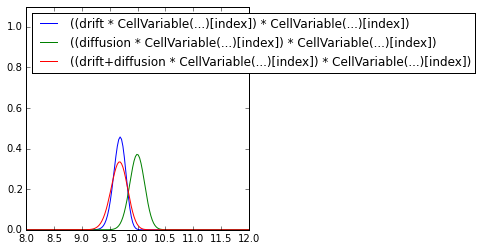

In [109]:
%matplotlib inline
#switch back to interactive instead of inline mode
from fipy import *
nx = 600
dx = 0.025
r_int = 1
L = nx*dx
mesh = Grid1D(nx=nx, dx=dx)+r_int
x = mesh.cellCenters[0]
x0 = 10.; sigma=0.05; fnorm = 1.0 #numerix.sqrt(2.*np.pi)*sigma
#print sigma,fnorm
##phi = P/j^2,  x= j= (r/r0)^{1/2}
phi_advc = CellVariable(name="drift",  mesh=mesh, value=0.)
phi_advc.setValue(numerix.exp(-(x-x0)**2/2./sigma**2)/fnorm/x**2, where=(x>x0-L/3) & (x<x0+L/3))

phi_diff = CellVariable(name="diffusion",  mesh=mesh, value=0.)
phi_diff.setValue(numerix.exp(-(x-x0)**2/2./sigma**2)/fnorm/x**2, where=(x>x0-L/3) & (x<x0+L/3))

phi_tot = CellVariable(name="drift+diffusion",  mesh=mesh, value=0.)
#phi.setValue(1., where=(x > L/2. - L/20.) & (x < L/2. + L/20.))
phi_tot.setValue(numerix.exp(-(x-x0)**2/2./sigma**2)/fnorm/x**2, where=(x>x0-L/3) & (x<x0+L/3))

taus=1.0
hor = 0.1
dp  = 0.05
gam  = hor*(taus/(1+taus**2))
beta = 0.25*hor*dp
valueLeft = 0
#valueRight = 0
#phi.constrain(valueRight, mesh.facesRight)
phi_advc.constrain(valueLeft, mesh.facesLeft)
phi_diff.constrain(valueLeft, mesh.facesLeft)
phi_tot.constrain(valueLeft, mesh.facesLeft)
print phi_advc*x**2

#vel = [0.+beta,] #[gam/X,]
#print vel
#D = beta

eq_advc = TransientTerm(coeff=x**2,var=phi_advc) == \
         ConvectionTerm(coeff=[gam,],var=phi_advc) #+ ExplicitDiffusionTerm(coeff=beta)
eq_diff = TransientTerm(coeff=x**2,var=phi_diff) == \
         ConvectionTerm(coeff=[beta,],var=phi_diff) + ImplicitDiffusionTerm(coeff=beta,var=phi_diff)
eq_tot =  TransientTerm(coeff=x**2,var=phi_tot)  == \
         ConvectionTerm(coeff=[beta+gam,],var=phi_tot)  + ImplicitDiffusionTerm(coeff=beta,var=phi_tot)
    
timeStepDuration = 0.5*6.28  #9 * dx**2 / (2 * D)
steps = 100*2

if __name__ == '__main__':
  viewer = Viewer(vars=(phi_advc*x*x,phi_diff*x*x,phi_tot*x*x),fipy_viewer='matplotlib', xmin=8,xmax=12, datamin=0., datamax=1.1)
  viewer.plot()
#  x = mesh.cellCenters()
#  t = timeStepDuration * steps
  

for step in range(steps):
  eq_advc.solve(var=phi_advc,dt=timeStepDuration)
  eq_diff.solve(var=phi_diff,dt=timeStepDuration)
  eq_tot.solve(var=phi_tot,dt=timeStepDuration)
  if __name__ == '__main__':
    viewer.plot()
print x
print phi_advc*x**2
print phi_diff*x**2
print phi_tot*x**2